In [238]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [239]:
#import datasets
cyberark = pd.read_excel(r'C:\Users\Jarrod\Documents\Data Science\Specialistinterne Workshop\SIEM Task\wbc_siem_cyberark_dataset.xlsx')
unix = pd.read_excel(r'C:\Users\Jarrod\Documents\Data Science\Specialistinterne Workshop\SIEM Task\wbc_siem_unix_auditd_dataset.xlsx')
windows = pd.read_excel(r'C:\Users\Jarrod\Documents\Data Science\Specialistinterne Workshop\SIEM Task\wbc_siem_windows_dataset.xlsx')

In [240]:
#Clean up all date fields
cyberark['Event Time'] = cyberark['Event Time'].str.replace('AEST', '')
cyberark['deviceCustomDate1'] = cyberark['deviceCustomDate1'].str.replace('AEST', '')
cyberark['deviceCustomDate2'] = cyberark['deviceCustomDate2'].str.replace('AEST', '')

unix['Event Time'] = unix['Event Time'].str.replace('AEST', '')
windows['Event Time'] = windows['Event Time'].str.replace('AEST', '')

#Convert all date fields to datetime
cyberark['Event Time'] = pd.to_datetime(cyberark['Event Time'], format='%Y-%m-%d %H:%M:%S')
cyberark['deviceCustomDate1'] = pd.to_datetime(cyberark['deviceCustomDate1'], format='%Y-%m-%d %H:%M:%S')
cyberark['deviceCustomDate2'] = pd.to_datetime(cyberark['deviceCustomDate2'], format='%Y-%m-%d %H:%M:%S')

unix['Event Time'] = pd.to_datetime(unix['Event Time'], format='%Y-%m-%d %H:%M:%S')
windows['Event Time'] = pd.to_datetime(windows['Event Time'], format='%Y-%m-%d %H:%M:%S')

In [241]:
#Drop time from 'Event Time' fields
unix['Event Time'] = unix['Event Time'].dt.date
windows['Event Time'] = windows['Event Time'].dt.date
print(unix['Event Time'].value_counts())
print(windows['Event Time'].value_counts())

2020-09-23    3
2020-09-21    3
2020-09-22    3
2020-09-24    3
2020-09-25    2
2020-09-28    2
2020-09-29    1
2020-09-30    1
2020-09-26    1
2020-09-19    1
Name: Event Time, dtype: int64
2020-09-22    6
2020-09-23    4
2020-09-24    2
Name: Event Time, dtype: int64


In [242]:
#Create new dataframe with access counts for each server
df1 = unix['Event Time'].value_counts().rename_axis('date').reset_index(name='unix')
df2 = windows['Event Time'].value_counts().rename_axis('date').reset_index(name='windows')
counts = pd.merge(df1, df2, how='outer').fillna(0)
counts['windows'] = counts['windows'].astype('int')
counts.sort_values('date', ascending=True, inplace=True)
counts.reset_index(drop=True)
print(counts)

         date  unix  windows
9  2020-09-19     1        0
1  2020-09-21     3        0
2  2020-09-22     3        6
0  2020-09-23     3        4
3  2020-09-24     3        2
4  2020-09-25     2        0
8  2020-09-26     1        0
5  2020-09-28     2        0
6  2020-09-29     1        0
7  2020-09-30     1        0


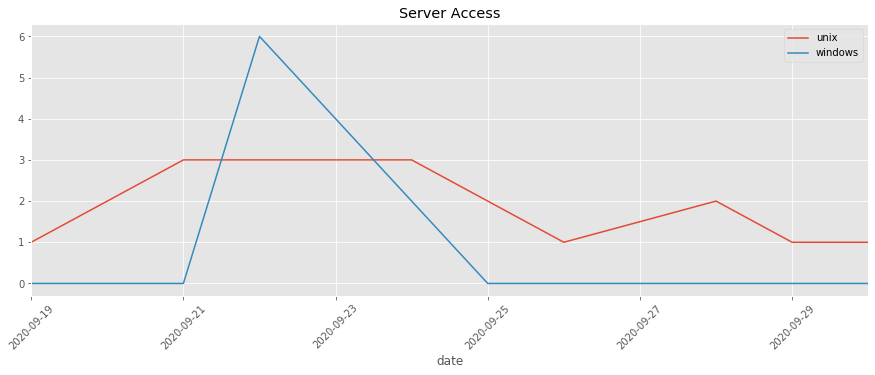

In [244]:
#Create a line graph 
counts.set_index('date').plot(figsize=(15,5), grid=True)
plt.style.use('ggplot')
plt.title('Server Access')
plt.xticks(rotation=45)
plt.savefig('server_access.png', bbox_inches='tight')

In [236]:
print(counts['windows'])

9    0
1    0
2    6
0    4
3    2
4    0
8    0
5    0
6    0
7    0
Name: windows, dtype: int32
